# Import Libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

import pandas as pd
import json
import librosa
#import librosa.display
import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.pyplot import specgram
import os


# Begin Importing Data for Processing

# Setting up the training and testing data

In [3]:
emotionsDf = pd.read_csv("9_27_2018_5_53_pm_emotions_and_speakers.csv")
from sklearn.utils import shuffle
shuffledDf = shuffle(emotionsDf)

divider = np.random.rand(len(shuffledDf)) < 0.9
train = shuffledDf[divider]
test = shuffledDf[~divider]

trainfeatures = train.iloc[:, :-1]
trainlabels = train.iloc[:, -1:]

testfeatures = test.iloc[:, :-1]
testlabels = test.iloc[:, -1:]

x_train = np.array(trainfeatures)
y_train = np.array(trainlabels)
x_test = np.array(testfeatures)
y_test = np.array(testlabels)

#flattening the arrays
y_train = np.hstack(y_train)
y_test = np.hstack(y_test)

#convert class vectors to binary class matrices.
num_classes = 7
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_test = np.expand_dims(x_test, axis=2)
x_train = np.expand_dims(x_train, axis=2)

x_train shape: (4059, 216)
4059 train samples
458 test samples


## Setting up the Keras Neural Network

In [4]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(128, 5, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(256, 5, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.Adadelta()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
metrics=['accuracy'])





In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Attempt9Architecture.png', show_shapes=True, show_layer_names=True)

In [6]:
model = Sequential()

num_classes = 7

model.add(Dense(256, input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 216, 256)          512       
_________________________________________________________________
activation_5 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 55296)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 387079    
_________________________________________________________________
activation_6 (Activation)    (None, 7)                 0         
Total params: 387,591
Trainable params: 387,591
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Attempt9_1Architecture.png', show_shapes=True, show_layer_names=True)

In [8]:
model = Sequential()

num_classes = 7

model.add(Conv1D(filters=32, kernel_size=3, padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 216, 32)           128       
_________________________________________________________________
activation_7 (Activation)    (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 108, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 108, 64)           6208      
_________________________________________________________________
activation_8 (Activation)    (None, 108, 64)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 54, 64)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 54, 32)            2080      
__________

In [10]:
model = Sequential()

num_classes = 7


model.add(Dense(32, input_shape=(216, 1)))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 216, 32)           64        
_________________________________________________________________
activation_11 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
dense_8 (Dense)              (None, 216, 32)           1056      
_________________________________________________________________
activation_12 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 48391     
_________________________________________________________________
activation_13 (Activation)   (None, 7)                 0         
Total para

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Attempt9_2Architecture.png', show_shapes=True, show_layer_names=True)

In [12]:
model = Sequential()

num_classes = 7

model.add(Conv1D(filters=32, kernel_size=5, padding='same',input_shape=(216,1)))
model.add(Activation('relu'))

model.add(Conv1D(filters=32, kernel_size=5, padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 216, 32)           192       
_________________________________________________________________
activation_14 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 216, 32)           5152      
_________________________________________________________________
activation_15 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 108, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 108, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3456)              0         
__________

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Attempt9_3Architecture.png', show_shapes=True, show_layer_names=True)

In [14]:
from keras.callbacks import TensorBoard

tensor_board = TensorBoard(log_dir='./Graph/run4', histogram_freq=0, write_graph=True, write_images=True)

batch_size = 32
epochs = 100

cnnhistory = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test), 
                callbacks=[tensor_board])

Train on 4059 samples, validate on 458 samples
Epoch 1/100
4059/4059 [==============================] - 143s 35ms/step - loss: 3.0621 - acc: 0.2799 - val_loss: 1.5725 - val_acc: 0.3144
Epoch 2/100
4059/4059 [==============================] - 131s 32ms/step - loss: 1.5922 - acc: 0.3353 - val_loss: 1.5658 - val_acc: 0.3188
Epoch 3/100
4059/4059 [==============================] - 347s 86ms/step - loss: 1.4677 - acc: 0.3772 - val_loss: 1.5652 - val_acc: 0.3865
Epoch 8/100
4059/4059 [==============================] - 99s 24ms/step - loss: 1.4461 - acc: 0.4031 - val_loss: 1.5795 - val_acc: 0.3865
Epoch 9/100
4059/4059 [==============================] - 98s 24ms/step - loss: 1.4108 - acc: 0.4228 - val_loss: 1.5139 - val_acc: 0.4410
Epoch 10/100
4059/4059 [==============================] - 97s 24ms/step - loss: 1.4082 - acc: 0.4240 - val_loss: 1.4821 - val_acc: 0.4520
Epoch 11/100
4059/4059 [==============================] - 97s 24ms/step - loss: 1.3465 - acc: 0.4558 - val_loss: 1.4962 - val_a

4059/4059 [==============================] - 38s 9ms/step - loss: 0.7407 - acc: 0.7260 - val_loss: 1.9542 - val_acc: 0.5262
Epoch 65/100
4059/4059 [==============================] - 31s 8ms/step - loss: 0.7219 - acc: 0.7305 - val_loss: 1.9362 - val_acc: 0.5240
Epoch 66/100
4059/4059 [==============================] - 28s 7ms/step - loss: 0.7052 - acc: 0.7322 - val_loss: 2.0168 - val_acc: 0.5175
Epoch 67/100
4059/4059 [==============================] - 23s 6ms/step - loss: 0.7120 - acc: 0.7278 - val_loss: 2.1151 - val_acc: 0.4847
Epoch 68/100
4059/4059 [==============================] - 22s 5ms/step - loss: 0.7012 - acc: 0.7391 - val_loss: 2.0204 - val_acc: 0.4891
Epoch 69/100
4059/4059 [==============================] - 22s 5ms/step - loss: 0.6998 - acc: 0.7361 - val_loss: 2.0408 - val_acc: 0.5218
Epoch 70/100
4059/4059 [==============================] - 29s 7ms/step - loss: 0.7090 - acc: 0.7310 - val_loss: 2.0153 - val_acc: 0.5066
Epoch 71/100
4059/4059 [==============================

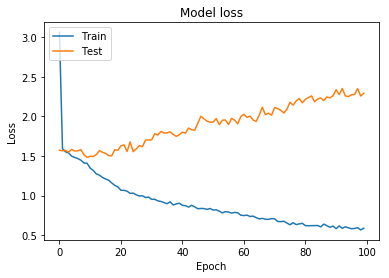

In [18]:
import matplotlib.pyplot as plt
# # Plot training & validation accuracy values
# plt.plot(cnnhistory.history['acc'])
# plt.plot(cnnhistory.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig("Attempt9Acc.png")

# Plot training & validation loss values
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("Attempt9Loss.png")

In [28]:
import matplotlib.pyplot as plt
#sigmoid
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

# Manual Verification

In [58]:
X, sample_rate = librosa.load("test_sample_d.wav", res_type='kaiser_fast',duration=5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature0 = mfccs

X, sample_rate = librosa.load("test_sample_a.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature1 = mfccs

X, sample_rate = librosa.load("test_sample_s.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature2 = mfccs

X, sample_rate = librosa.load("test_sample_a_2.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature3 = mfccs

X, sample_rate = librosa.load("test_surprise.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature4 = mfccs


feature0 = np.pad(feature0, (0, 216-feature0.shape[0]), 'mean')
feature0 = feature0.reshape(1, 216, 1)

feature1 = np.pad(feature1, (0, 216-feature1.shape[0]), 'mean')
feature1 = feature1.reshape(1, 216, 1)

feature2 = np.pad(feature2, (0, 216-feature2.shape[0]), 'mean')
feature2 = feature2.reshape(1, 216, 1)

feature3 = np.pad(feature3, (0, 216-feature3.shape[0]), 'mean')
feature3 = feature3.reshape(1, 216, 1)

feature4 = np.pad(feature4, (0, 216-feature4.shape[0]), 'mean')
feature4 = feature4.reshape(1,216,1)

# feats = [feature0, feature1]
# 0 angry
# 1 fear
# 2 disgust
# 3 happy
# 4 sad
# 5 neutral
# 6 surprise


prediction0 = model.predict_classes(feature0)
prediction1 = model.predict_classes(feature1)
prediction2 = model.predict_classes(feature2)
prediction3 = model.predict_classes(feature3)
prediction4 = model.predict_classes(feature4)

In [59]:
print(".   ", prediction0)

.    [5]
